1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz. (Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos list, prueben hacer directamente $(list-S)/S$ ).

In [1]:
#Definimos nuestra función
function f(x)
    x^3-x^2-x-1
end
;

In [2]:
#Definimos la derivada de la función anterior
function df(x)
    3x^2-2x-1
end
;

In [3]:
function raizNewton(x0) #x0 es la condición inicial
    raiz=[]      #en esta lista se guarda el valor de la raíz obtenidad
    for i in 1:100  #definimos el número de veces que se realizará el método
        x0=x0-f(x0)/df(x0)  #método de Newton
        push!(raiz,x0)
    end
    return raiz
end
;

In [4]:
#Nuestros 4 listados para las 4 condiciones iniciales
list1=raizNewton(-15)
list2=raizNewton(-1.45)
list3=raizNewton(6)
list4=raizNewton(16.5)
;

In [5]:
using PyPlot

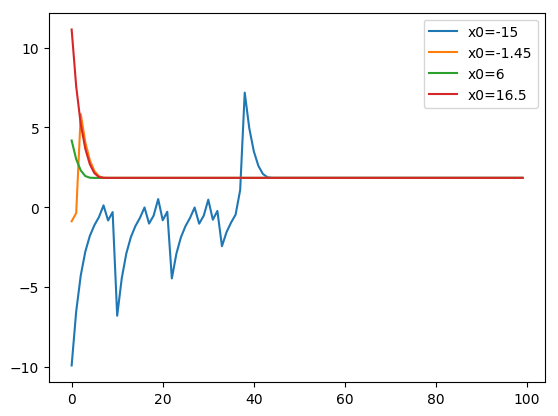

In [6]:
plot(real(list1),label = "x0=-15")
plot(real(list2),label = "x0=-1.45")
plot(real(list3),label = "x0=6")
plot(real(list4),label = "x0=16.5")
legend()
show()

Error relativo $\frac{(x_k-S)}{S}$

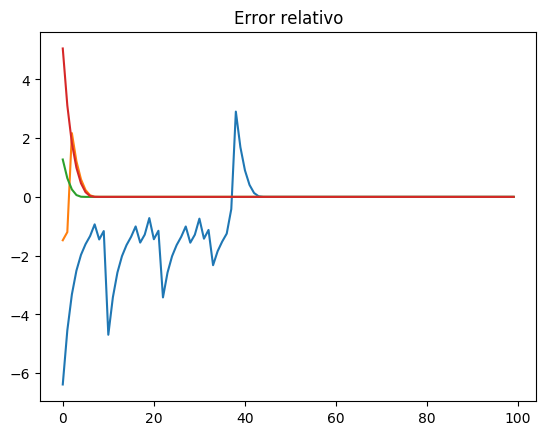

In [7]:
S=1.8392867552141612
plot((list1-S)/S)
plot((list2-S)/S)
plot((list3-S)/S)
plot((list4-S)/S)
title("Error relativo")
show()

* Hacer lo mismo usando el método de bisección para $p_k$.

In [8]:
function biseccion(a,b)         
    list=zeros(50) 
    p = (a+b)/2            # punto medio del intervalo 
    f(x)=x^3-x^2-x-1
    for i in 1:50          
        if  f(a)*f(p) > 0  # método de bisección
            a = p
        end
        if f(b)*f(p) > 0   
            b = p
        end
        p = (a+b)/2       
        list[i]=p         
    end
    return list           
end;

In [9]:
list5=biseccion(0,5)
list6=biseccion(0,10)
list7=biseccion(0,15)
list8=biseccion(0,25)
;

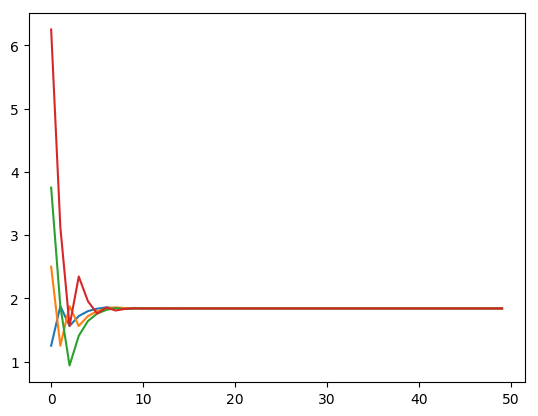

In [10]:
plot(real(list5))
plot(real(list6))
plot(real(list7))
plot(real(list8))
;

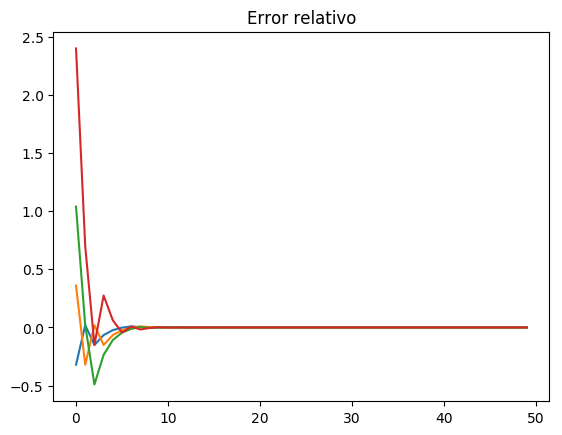

In [11]:
S=1.8392867552141612      

#Calculando el error relativo 

plot((list5-S)/S)
plot((list6-S)/S)
plot((list7-S)/S)
plot((list8-S)/S)
title("Error relativo")
show()

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones __(Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios)__:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`. El _output_ debe ser alguna raíz.

In [12]:
function metodoNewton(x0,f,df)
    for i in 1:100
        x0=x0-f(x0)/df(x0)
    end
    return x0,f(x0)
end
;

In [13]:
metodoNewton(0.4,f,df)

(1.8392867552141612, 2.220446049250313e-16)

* Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con `linspace`. Es muy probable que funcione la _rutina_ que crearon en el punto anterior llamandola como:               
`metodo_newton.(f,df,x)` (noten el punto).

In [14]:
function metodoNewtonIntervalo(f,df,intervalo)
    raices=[]
    for i in 1:length(intervalo)
        x0=intervalo[i] #que tome el primer elemento
        for n in 1:100 #ciclos para el método de Newton
            x0=x0-(f(x0)/df(x0))
        end
        push!(raices,x0)
    end
    raices
end
;

In [15]:
x=linspace(0,10,6)
metodoNewtonIntervalo(f,df,x)

6-element Array{Any,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

 * Crear la misma rutina, pero que esta vez en lugar de dar como _output_ todo el vector de raices (que inevitablemente estan repetidas), de solo la lista con la raices que son genuinamente diferentes hasta un $\epsilon$, despues su rutina deberá guardar las raices diferentes en un vector, digamos $t$, aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como `t=[]`. El _output_ tiene que ser precisamente `t`. 


In [16]:
function newtonEpsilon(intervalo)
    epsilon = 0.0000009
    t=[] #arreglo vacío para guardar las raices que son distinas un cierto epsilon
    lista=metodoNewtonIntervalo(f,df,x)
    push!(t,lista[1])   
    for i in 1:length(t)
        for k in 1:length(lista) #aquí se van a descartar los que son iguales
            if abs(t[i]-lista[k])>epsilon #con esto se anexarán los valores dado nuestro epsilon
                push!(t,lista{k})
            end
        end
        return t #nos da las raices dado nuestro epsilon
    end
end
;

In [17]:
newtonEpsilon(x)

1-element Array{Any,1}:
 1.83929

   * __La función que reciba esta rutina debe ser de `Julia` y el _output_ debe ser un flotante (No un número simbólico!)__, para la derivada pueden usar `SymPy` internamente, recuerden que es facil convertir funciones de `Julia` en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de `Julia` e iterarlas, consulten la parte donde vimos la función `lambdify`. 

In [18]:
using SymPy

In [19]:
function newtonSymPy(x0,f)
    x=Sym("x")  #ponemos a x como variable simbolica
    df=diff(f(x),x) #obtenemos la derivada de nuestra función
    dfJ=lambdify(df,[x]) #usando lambdify la pasamos a una función de Julia
    x=x0
    for i in 1:100
        x=x-f(x)/dfJ(x)
    end
    println("la raíz es"," ",x)
end
;

In [20]:
newtonSymPy(5.6,f)

la raíz es 

  likely near In[20]:1
  likely near In[20]:1
  likely near In[20]:1
in jprint at /Users/SOE/.julia/v0.6/SymPy/src/display.jl


1.8392867552141612
